In [ ]:
# CONVERGENCE OF SEQUENCES

In [13]:
model = (; 
β = 0.96,
δ = 0.1,
α = 0.3, 
γ = 4,
s = 0.2)

(β = 0.96, δ = 0.1, α = 0.3, γ = 4, s = 0.2)

In [14]:
function f(k, p)
    (;α, δ, s) = p

    y = k^α
    i = s*y

    k = (1-δ)*k + i
    return k
end

f (generic function with 1 method)

In [15]:
@time f(2,model)

  0.005232 seconds (2.35 k allocations: 112.094 KiB, 99.45% compilation time)


2.0462288826689834

In [23]:
function simulate(k0, T, p)

    res = [k0]

    for t in 1:T
        k = res[end]
        kprime = f(k, p)
        push!(res,kprime)
    end
    
    return res
end

simulate (generic function with 1 method)

In [36]:
T = 100
res = simulate(2.0, T, model)

101-element Vector{Float64}:
 2.0
 2.0462288826689834
 2.089528674917447
 2.1300608401704926
 2.167981873889157
 2.2034426980783923
 2.236588248806851
 2.2675572178060395
 2.2964819166036654
 2.323488237574935
 ⋮
 2.6908875669597023
 2.6909514609901906
 2.691010882877752
 2.691066145613052
 2.6911175402854264
 2.691165337614891
 2.691209789377058
 2.691251129728435
 2.691289576439058

In [25]:
using Plots

In [29]:
import Plots

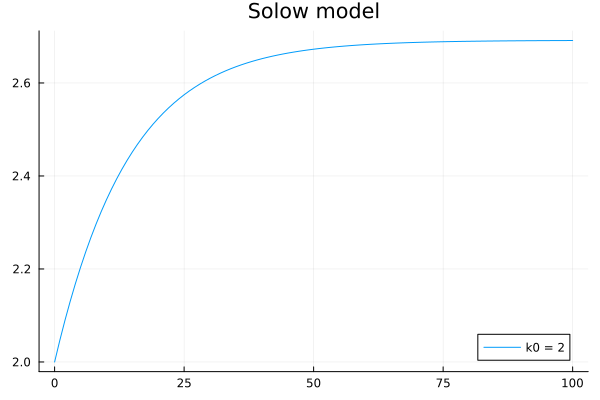

In [41]:
tvec = 0:T

plot(tvec, res; title = "Solow model", label = "k0 = 2")

In [43]:
res1 = simulate(1.0,T, model)
res10 = simulate(10.0,T, model)

101-element Vector{Float64}:
 10.0
  9.399052462993776
  8.850848701472113
  8.35046674069035
  7.893464824941678
  7.475833524166467
  7.093952632109313
  6.744552378916678
  6.424678528604677
  6.131660974575187
  ⋮
  2.6989940305647067
  2.6984902738415317
  2.6980218073107323
  2.6975861569827364
  2.697181022543581
  2.696804265130622
  2.696453895972987
  2.696128065835014
  2.695825055205418

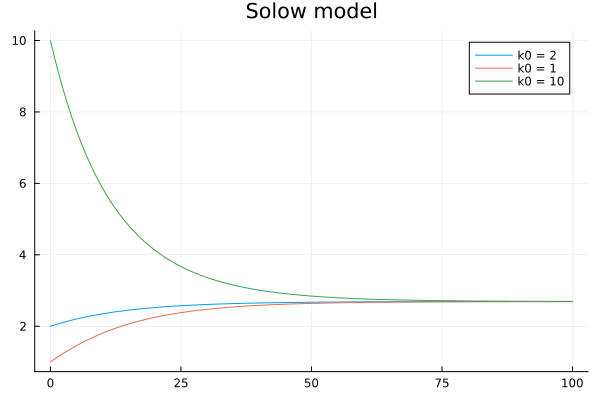

In [48]:
pl = plot(tvec, res; title = "Solow model", label = "k0 = 2")
plot!(pl, tvec, res1; label = "k0 = 1")
plot!(pl, tvec, res10; label = "k0 = 10")
pl